In [17]:
# Load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model Selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


In [4]:
# Load the data
df = pd.read_csv("Churn_Modelling.csv", index_col=0)

df.head()


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.index.name = "index"

df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
index,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<br>

Unnecessary columns that will be removed `CustomerId` and `Surname`

All numeric features will be scaled before modelling.

The `Gender` and `Geography` column will be encoded. 

</br>

### Remove Uneccessary Columns

In [8]:
# create a copy
new_df = df.copy()

In [9]:
to_remove = ["CustomerId", "Surname"]

dropped_df = new_df.drop(to_remove, axis=1)

dropped_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
index,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Convert `Gender` and `Geography`

In [10]:
# Check for duplicaed values
dropped_df.duplicated().sum()

0

In [11]:
# Encode Gender into 0 and 1
gender_dict = {"Male": 0, "Female":1}

# 
dropped_df['Gender'] = dropped_df['Gender'].map(gender_dict)

dropped_df['Gender']

index
1        1
2        1
3        1
4        1
5        1
        ..
9996     0
9997     0
9998     1
9999     0
10000    1
Name: Gender, Length: 10000, dtype: int64

In [12]:
dropped_df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
# Create a dictionary for the geography
geography_dict = {"France": 0, "Germany": 1, "Spain": 2}

# Map the features
dropped_df['Geography'] = dropped_df['Geography'].apply(lambda x: geography_dict.get(x))

dropped_df['Geography']

index
1        0
2        2
3        0
4        0
5        2
        ..
9996     0
9997     0
9998     0
9999     1
10000    0
Name: Geography, Length: 10000, dtype: int64

In [14]:
dropped_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
index,,,,,,,,,,,
1,619,0,1,42,2,0.00,1,1,1,101348.88,1
2,608,2,1,41,1,83807.86,1,0,1,112542.58,0
3,502,0,1,42,8,159660.80,3,1,0,113931.57,1
4,699,0,1,39,1,0.00,2,0,0,93826.63,0
5,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [15]:
dropped_df.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
index,,,,,,,,,,,
9996,771,0,0,39,5,0.00,2,1,0,96270.64,0
9997,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9998,709,0,1,36,7,0.00,1,0,1,42085.58,1
9999,772,1,0,42,3,75075.31,2,1,0,92888.52,1
10000,792,0,1,28,4,130142.79,1,1,0,38190.78,0


In [21]:
dropped_df['Exited'].value_counts(normalize=True)* 100


Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

__NOTE:__

The `Existed` column has a 80:20 split meaning it is **moderately imbalanced**. I will apply SMOTE and class weights to ensure models are not biased.

## Split the data into training and test sets

In [26]:
# Split the data
X = dropped_df.drop(columns=['Exited']) # Features
y = dropped_df['Exited'] # Target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [27]:
# Standard scalling for Logistic Regression and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Min Max Scalling for KNN
min_max = MinMaxScaler()
X_train_min_max = min_max.fit_transform(X_train)
X_test_min_max = min_max.transform(X_test)

In [29]:
# Train baseline models
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_tain)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_min_max, y_train)


KNeighborsClassifier()

Logistsic Regression Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Confusion Matrix:
 [[1559   48]
 [ 322   71]]


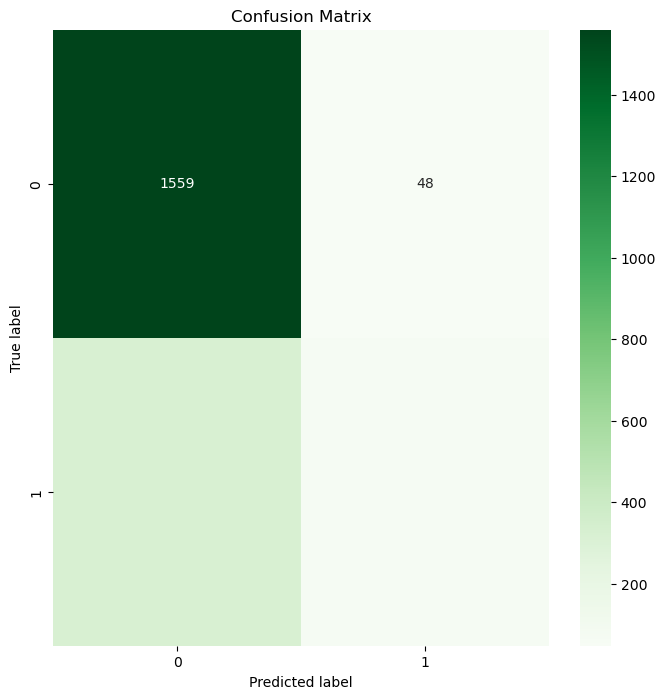

In [37]:
# Evaluate baseline models
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_xgb = xgb.predict(X_test)
y_pred_knn = knn.predict(X_test_min_max)

# Print evaluation for Logistsic Regression
print("Logistsic Regression Report:")
print(classification_report(y_test, y_pred_logreg))
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:\n", cm_logreg)

# Create a Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

__NOTE:__ **Results Interpretation**


XGBoost Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Confusion Matrix:
 [[1523   84]
 [ 194  199]]


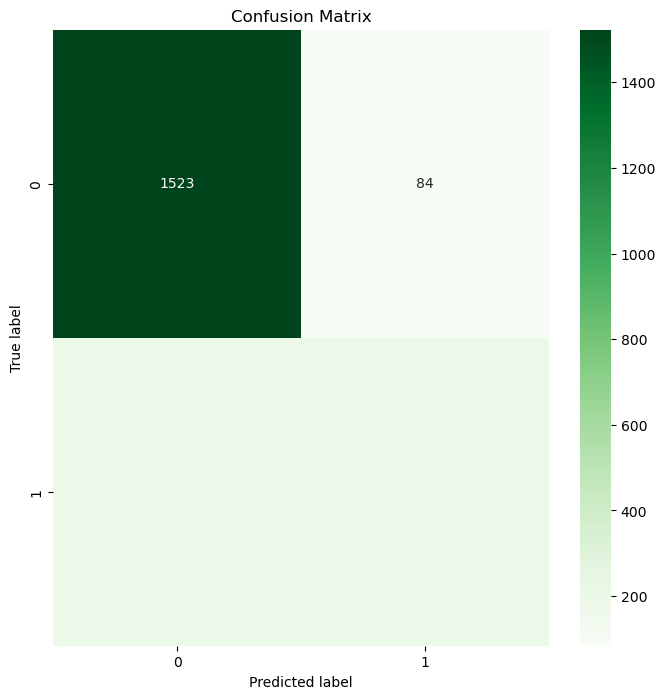

In [38]:
# Print evaluation for XGBoost
print("XGBoost Report:")
print(classification_report(y_test, y_pred_xgb))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:\n", cm_xgb)

# Create a Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

XGBoost Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1607
           1       0.60      0.33      0.42       393

    accuracy                           0.82      2000
   macro avg       0.72      0.64      0.66      2000
weighted avg       0.80      0.82      0.80      2000

Confusion Matrix:
 [[1520   87]
 [ 265  128]]


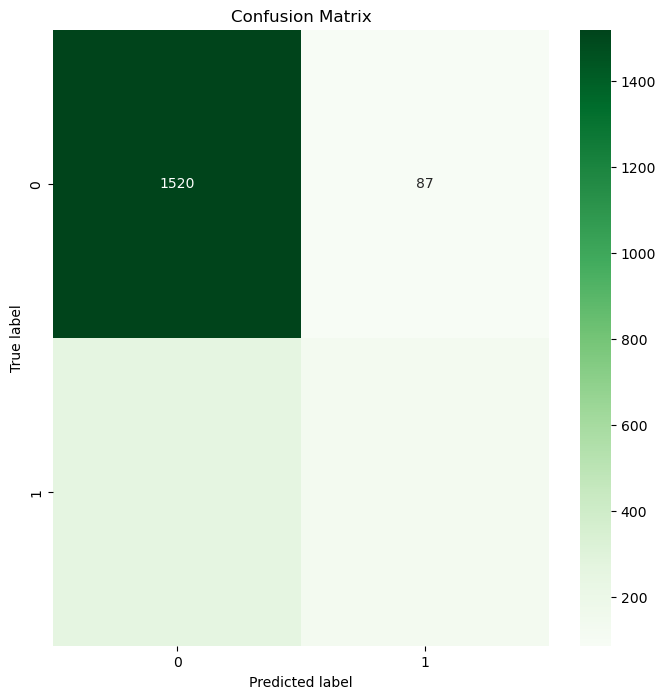

In [39]:
# Print evaluation for KNeighborsClassifier
print("XGBoost Report:")
print(classification_report(y_test, y_pred_knn))
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", cm_knn)

# Create a Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();